In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
df = pd.read_csv("../data/historique-production-electricite-quebec.csv")

In [3]:
df = df[["Date","Wind"]]

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date') 

C:\Users\manim\AppData\Local\Temp\ipykernel_15760\2522869548.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Date'] = pd.to_datetime(df['Date'])


In [7]:
# Extract 'Year' and 'Month-Day' for plotting
df['Year'] = df['Date'].apply(lambda x: x.year)
df['MonthDay'] = df['Date'].apply(lambda x: x.strftime('%m-%d'))

In [9]:
df['Year'].unique()

array([2019, 2020, 2021, 2022, 2023])

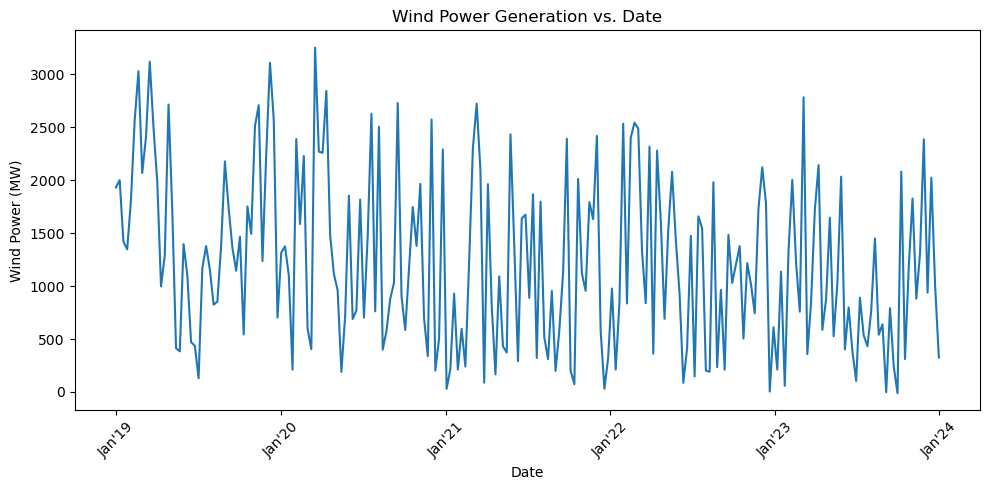

In [36]:
step = 200          # to select rows periodically
fig, ax = plt.subplots(figsize=(10, 5))         
ax.plot(df['Date'][0:-1:step], df['Wind'][0:-1:step])

# Format x-axis as "Jan'23"
date_format = mdates.DateFormatter("%b'%y")
ax.xaxis.set_major_formatter(date_format)

# Optional: rotate x-axis labels for clarity
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Wind Power (MW)")
plt.title("Wind Power Generation vs. Date")

plt.tight_layout()
plt.show()


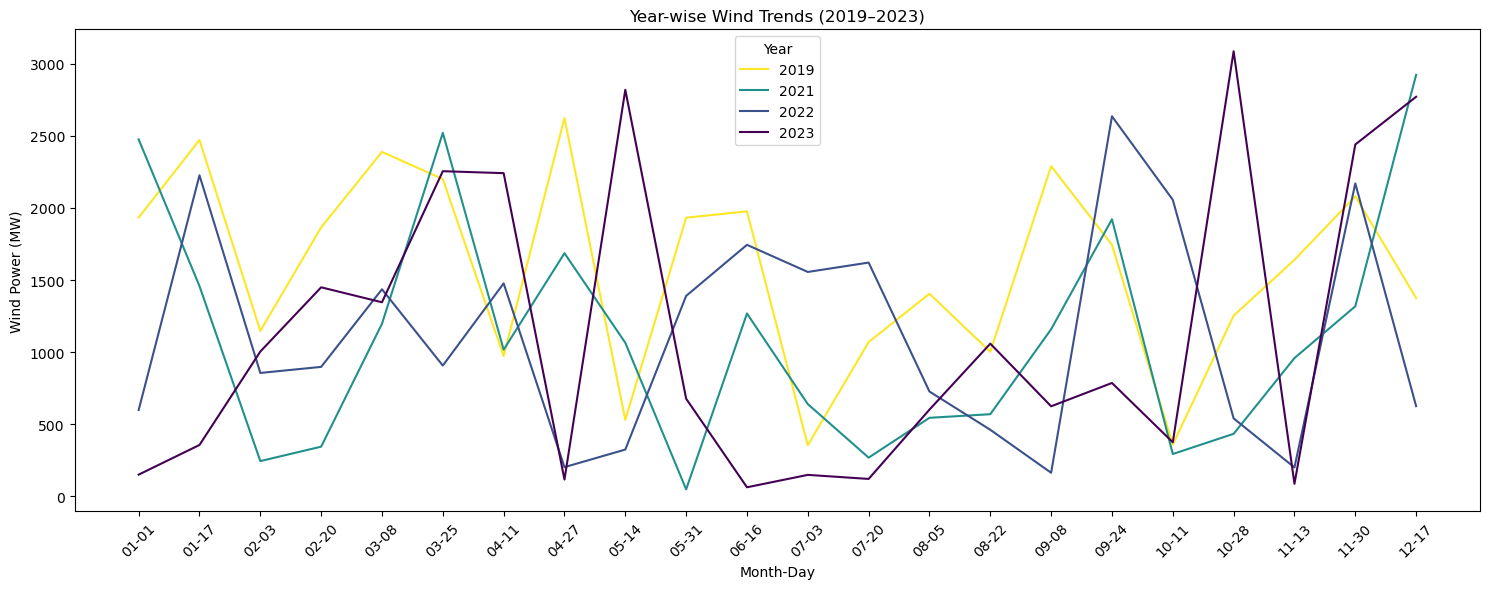

In [67]:
# Extract 'Year' and 'Month-Day' for plotting
df['Year'] = df['Date'].apply(lambda x: x.year)
df['MonthDay'] = df['Date'].apply(lambda x: x.strftime('%m-%d'))

# Pivot: plot Month-Day vs Wind for each year
plt.figure(figsize=(15, 6))

#no_points_per_year = 100
steps = 400         # only take points periodically after this value
years = sorted(df['Year'].unique())
colors = plt.cm.viridis_r(np.linspace(0, 1, len(years)))  

for i, year in enumerate(years):
    if year.astype(str) == '2020':   # WARNING: possible need of data cleaning for 2020
        continue
    yearly_data = df[df['Year'] == year].sort_values('MonthDay')
    yearly_data = yearly_data[0:-1:steps]       # exclude points while plotting
    plt.plot(yearly_data['MonthDay'], yearly_data['Wind'], label=str(year), color=colors[i])


plt.xlabel("Month-Day")
plt.ylabel("Wind Power (MW)")
plt.title("Year-wise Wind Trends (2019–2023)")
plt.xticks(rotation=45)
plt.legend(title="Year")
plt.tight_layout()
plt.show()

In [39]:
for s in ["2019","2020","2021","2022","2023"]:
    print(s, len(df[df["Year"].astype(str) == s]))

2019 8760
2020 8784
2021 8760
2022 8760
2023 8760


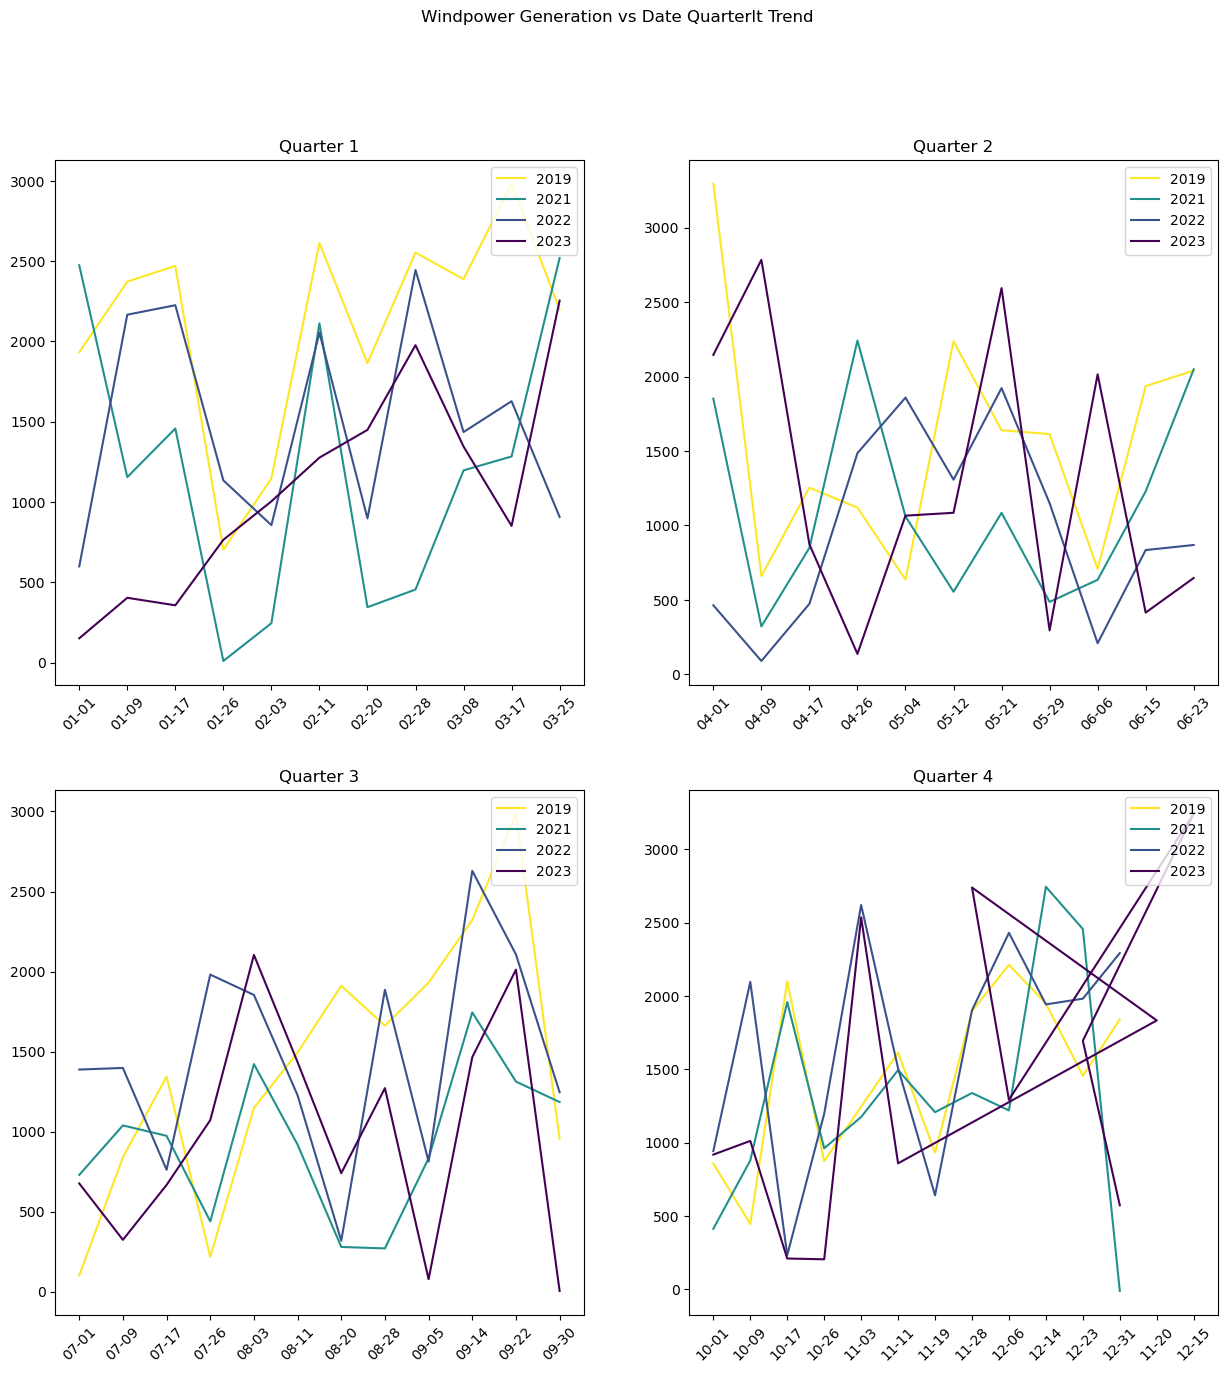

In [ ]:
# Extract 'Year' and 'Month-Day' for plotting
df['Quarter'] = df['Date'].apply(lambda x: x.quarter)

figure, axis = plt.subplots(2, 2, figsize=(15, 15))
quarter_dict = {1: (0,0), 2:(0,1), 3: (1,0), 4: (1,1)}
figure.suptitle("Windpower Generation vs Date Quarterly Trend")

#no_points_per_year = 100
steps = 200
years = sorted(df['Year'].unique())
colors = plt.cm.viridis_r(np.linspace(0, 1, len(years)))  

for i, year in enumerate(years):
    if year.astype(str) == '2020':   # WARNING: possible need of data cleaning for 2020
        continue
    yearly_data = df[df['Year'] == year].sort_values('MonthDay')
    for q in [1,2,3,4]:
        quarterly_data = yearly_data[yearly_data['Quarter'] == q]
        quarterly_data_steps = quarterly_data[0:-1:steps]   #exclude points while plotting
        ax = axis[quarter_dict[q]]
        ax.plot(quarterly_data_steps ['MonthDay'], quarterly_data_steps ['Wind'], label=str(year), color=colors[i])
        ax.set_title(f"Quarter {q}")
        ax.legend(loc='upper right')
        ax.tick_params(axis='x', rotation = 45)

plt.show()

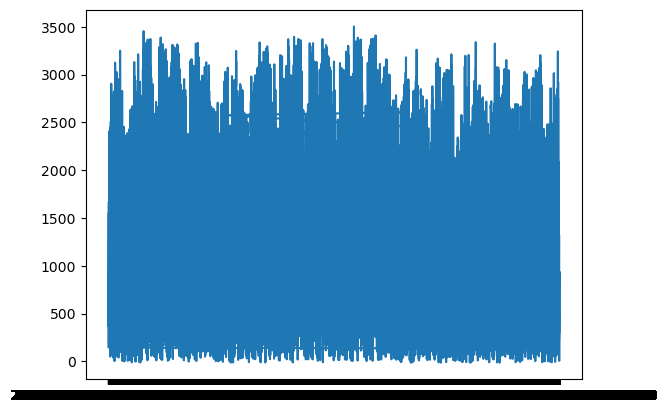

In [ ]:
# the naive approach to plot where you can't see anything basically

plt.plot(df.Date, df.Wind)